# Clustering on MNIST Dataset
In this exercise, you will finish working with the MNIST dataset, using clustering algorithms to attempt to recreate the clusters. 

Your task is to implement an algorithm that clusters handwritten digits, and evaluate how well this reconstructs the true groupings (by actual labeled value). 

Read more about this dataset [here](https://en.wikipedia.org/wiki/MNIST_database)

0


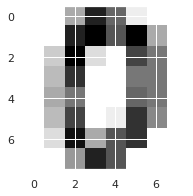

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
print(digits.target[0])
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# This block converts code into the appropriate shape for visualization
# and splits the data into train/test split. 
# No changes are required. 
from sklearn.model_selection import train_test_split
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# data_train, data_test, target_train, target_test = train_test_split(
#     data, digits.target, test_size=0.33, random_state=42)
# print(data_train.shape,data_test.shape,target_train.shape,target_test.shape)

### Part 1: t-SNE 
First, use t-SNE to reduce the data to 2 dimensions. Plot these data, coloring each point by the true cluster. 

You can refer to the solution from the dimensionality reduction exercise [here](https://colab.research.google.com/drive/1nTi37NpHcbEPy0-ynqDQtgVJn5NHJ9Km?usp=sharing)

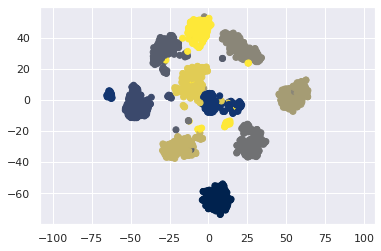

In [ ]:
from sklearn.manifold import TSNE
model = TSNE( n_components=2,perplexity=30)
tsne_out = model.fit_transform(data)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=digits.target, cmap='cividis')
plt.axis('equal');

### Part 2: k-means, no transformation
Use k-means (with $k=10$) to find clusters of the data. Visualize the output, by coloring each point from the t-SNE plot with a color corresponding to its cluster assignment.

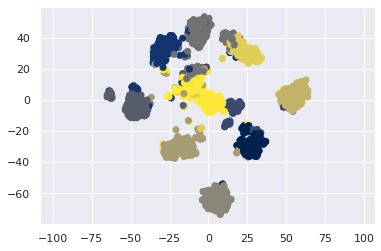

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=kmeans.labels_, cmap='cividis')
plt.axis('equal');

### Part 3: k-means, after t-SNE
Use t-SNE to reduce the data to 2 dimensions, then use k-means clustering to find clusters of the data. 
Visualize the cluster labels on the t-SNE dimensionality reduction

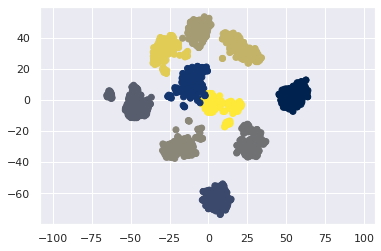

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_out)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=kmeans.labels_, cmap='cividis')
plt.axis('equal');

#### Evaluation: Elbow Plot
Produce an elbow plot of the inertia (within cluster sum of squares, $\displaystyle \sum_{i=0}^n \min_{\mu_j \in C} (\| x_i - \mu_j\|^2)$) as you increase the number of clusters. 

What does this approach suggest is a good number of clusters? 

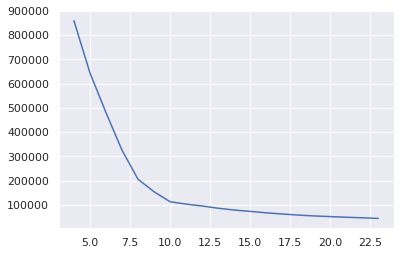

In [29]:
# Add code to find and plot inertia for each number of cluters
clusters_list = []
inertia_list = []
from sklearn.cluster import KMeans
for n_clusters in range(4,20):
  clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(tsne_out)
  inertia_list.append(clusterer.inertia_)
  clusters_list.append(n_clusters)
plt.plot(clusters_list,inertia_list);


#### Evaluation: Silhouette Plot

Produce a silhouette plot for $k = 8, 9, 10, 11, 12$. What does this approach suggest is a good number of clusters? 

Refer to [this page](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for guidance on producing silhouette plots.

For n_clusters = 8 The average silhouette_score is : 0.61751485


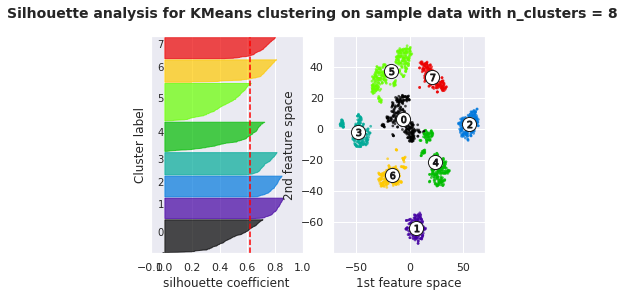

For n_clusters = 9 The average silhouette_score is : 0.6355263


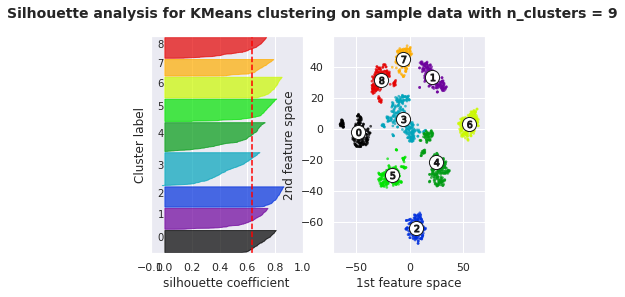

For n_clusters = 10 The average silhouette_score is : 0.6478345


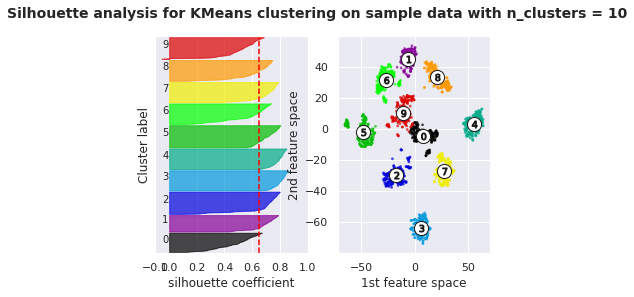

For n_clusters = 11 The average silhouette_score is : 0.6359605


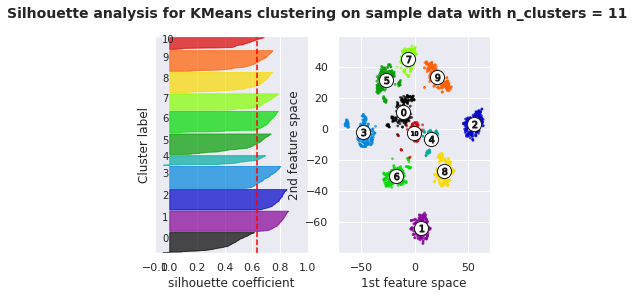

For n_clusters = 12 The average silhouette_score is : 0.6213985


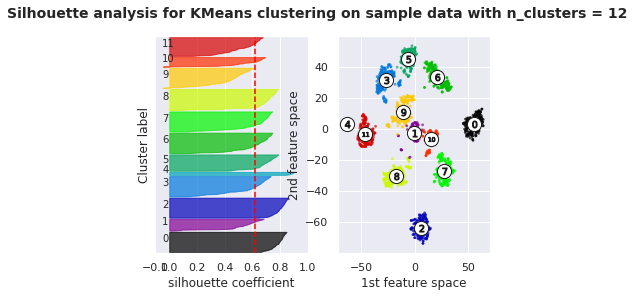

In [26]:
range_n_clusters = [8, 9, 10, 11, 12]
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def make_silhouette_plot(cluster_labels, data, plotting_data=None):
  """
  Calculates the silhouette plot of your data, and plots alongside 
  the cluster labels. 
  Inputs: cluster_labels (n x 1 array), plotting_data (n x 2) array, data (n x num_features) array
  where n=number of data points. 
  plotting_data will be the data used to plot the data.
  data is used to compute the distances for the silhouette score. 
  """
  sample_silhouette_values = silhouette_samples(data, cluster_labels) 

  # The following code produces the plots - this should not need to be changed. 
  if plotting_data is None: plotting_data = data
  fig, (ax1, ax2) = plt.subplots(1, 2)
  n_clusters = len(np.unique(cluster_labels))
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
  silhouette_avg = np.mean(sample_silhouette_values)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  # Finds the silhouette score for each sample 
  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_xlabel("silhouette coefficient")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(plotting_data[:, 0], plotting_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')
  # Labeling the clusters
  centers = np.array([np.mean(data[cluster_labels == i,:],axis=0) for i in np.unique(cluster_labels)])
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_xlabel("1st feature space")
  ax2.set_ylabel("2nd feature space")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
  plt.show()

# Here, add code to call the appropriate function and produce the appropriate plots. 
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(tsne_out)
  make_silhouette_plot(cluster_labels, tsne_out)

#### Evaluation: Compare to Actual Labels
Here, we compare the produced labels with the actual labels. 

You cannot expect the label of each cluster to match the true values, so the first step is to transform the cluster labels so that they correspond to the true labels. 
This function is provided - for each cluster label, it finds the most common true label from those data points. 

Your task is to find the distance between cluster mappings, as the percentage of target labels that agree with the cluster labels. 

In [30]:
# TODO: fill in code to find the percentage of target labels that agree with cluster labels
from scipy import stats
def transform_labels(cluster_labels, true_labels):
  transform_dict = {}
  for n in np.unique(cluster_labels):
    target_subset = true_labels[cluster_labels == n]
    mode = stats.mode(target_subset)
    transform_dict[n] = int(mode.mode)
  transformed_data = np.array([transform_dict[target] for target in cluster_labels])
  return transformed_data

# <ADD YOUR CODE TO CALCULATE THE PERCENT OF TARGET LABELS THAT MATCH CLUSTERS>
new_data = transform_labels(kmeans.labels_, digits.target)
print(np.mean(new_data == digits.target))
# could also generate a confusion matrix here! 

0.9471341124095715


### Part 4: k-means after PCA
se PCA to reduce the dimensionality to 2 dimensions, then use k-means clustering to find data centers.  Visualize the cluster labels on the t-SNE dimensionality reduction, then  evaluate the model using the above methods. 

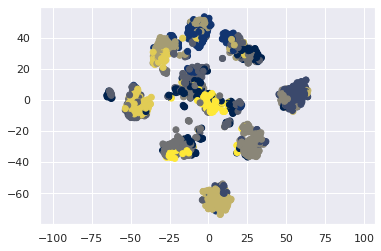

In [35]:
# Add code here to transform data using PCA and find clusters, then to plot the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_out = pca.fit_transform(data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(pca_out)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=kmeans.labels_, cmap='cividis')
plt.axis('equal');

#### Evaluation: Produce Elbow Plot

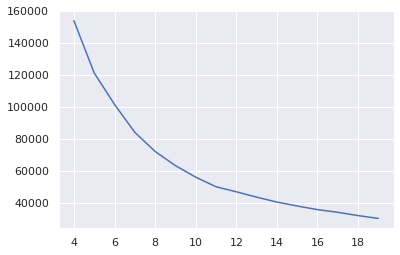

In [37]:
# add code to produce an elbow plot of k-means performance 
clusters_list = []
inertia_list = []
from sklearn.cluster import KMeans
for n_clusters in range(4,20):
  clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(pca_out)
  inertia_list.append(clusterer.inertia_)
  clusters_list.append(n_clusters)
plt.plot(clusters_list,inertia_list);

#### Evaluation: Silhouette Plots

For n_clusters = 8 The average silhouette_score is : 0.396810349482472


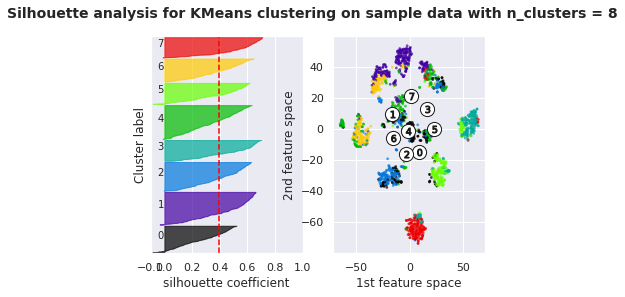

For n_clusters = 9 The average silhouette_score is : 0.40485611236406027


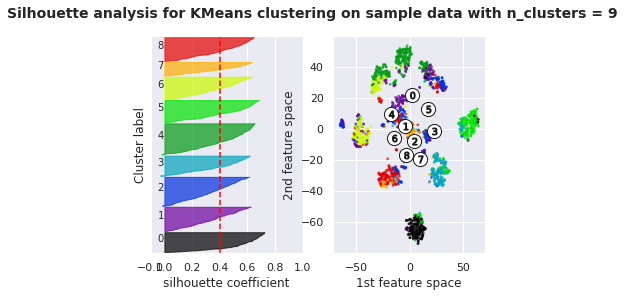

For n_clusters = 10 The average silhouette_score is : 0.3926407857903693


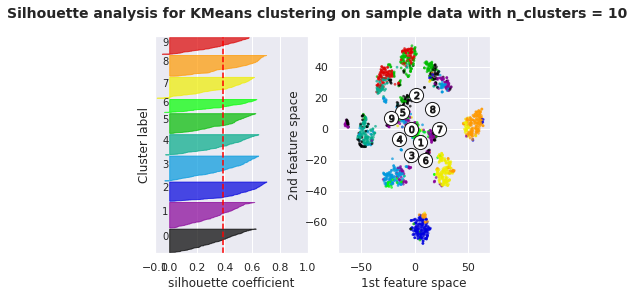

For n_clusters = 11 The average silhouette_score is : 0.38878209600112595


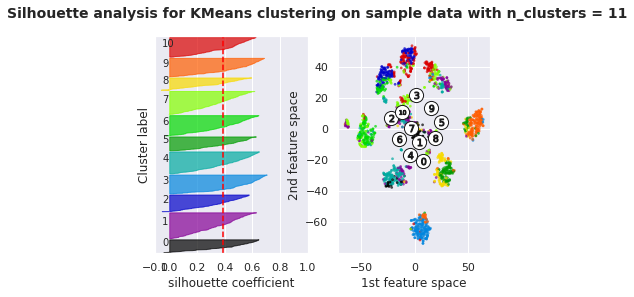

For n_clusters = 12 The average silhouette_score is : 0.3868961787870475


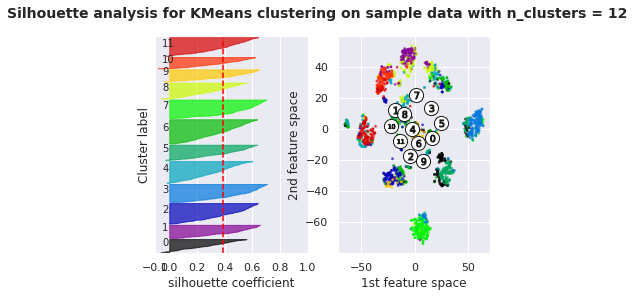

In [36]:
# add code to produce silhouette plots of k-means performance
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(pca_out)
  make_silhouette_plot(cluster_labels, pca_out, tsne_out)

#### Evaluation: compare to ground truth 

In [39]:
# Add code to compare the cluster labels to the ground truth 
new_data = transform_labels(kmeans.labels_, digits.target)
print(np.mean(new_data == digits.target))

0.6071229827490262


### Part 5: k-means after PCA, 30 components
Use PCA to reduce the dimensionality to 30 dimensions, then use k-means clustering to find data centers.  Visualize the cluster labels on the t-SNE dimensionality reduction, then  evaluate the model using the above methods. 
How does this compare to the 2-dimensional case? What does this suggest about the complexity of the data?

(-71.82623882293701, 70.45735378265381, -79.98989524841309, 59.85585441589355)

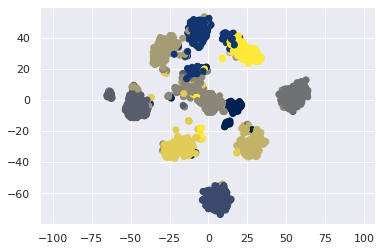

In [48]:
# Add code to transform data using PCA with 30 components, and plot the output
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca_out = pca.fit_transform(data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(pca_out)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=kmeans.labels_, cmap='cividis')
plt.axis('equal')

#### Evaluation: produce elbow plot

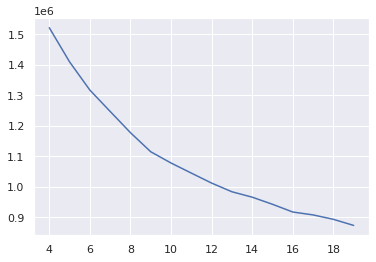

In [49]:
# add code to produce an elbow plot of k-means performance 
clusters_list = []
inertia_list = []
from sklearn.cluster import KMeans
for n_clusters in range(4,20):
  clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(pca_out)
  inertia_list.append(clusterer.inertia_)
  clusters_list.append(n_clusters)
plt.plot(clusters_list,inertia_list);

#### Evaluation: produce silhouette plot

For n_clusters = 8 The average silhouette_score is : 0.18951944548347724


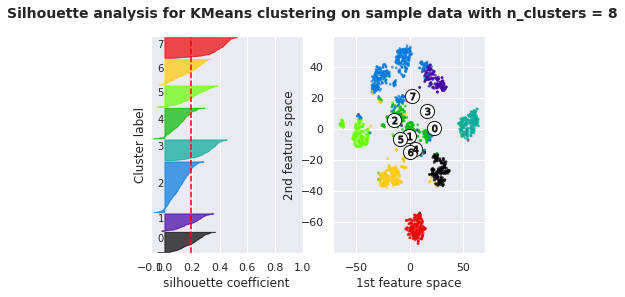

For n_clusters = 9 The average silhouette_score is : 0.20056355737681836


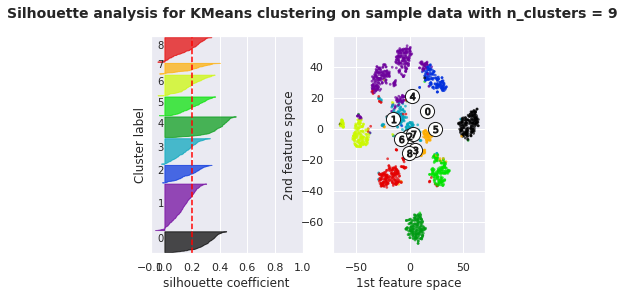

For n_clusters = 10 The average silhouette_score is : 0.1937888192931931


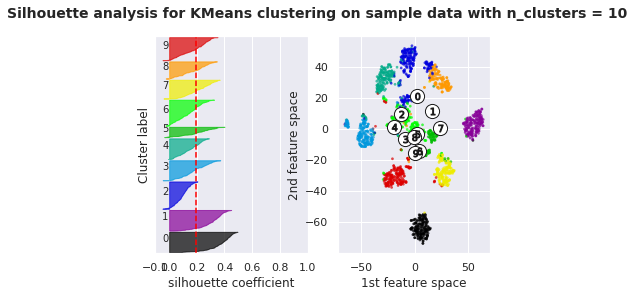

For n_clusters = 11 The average silhouette_score is : 0.19556308518093782


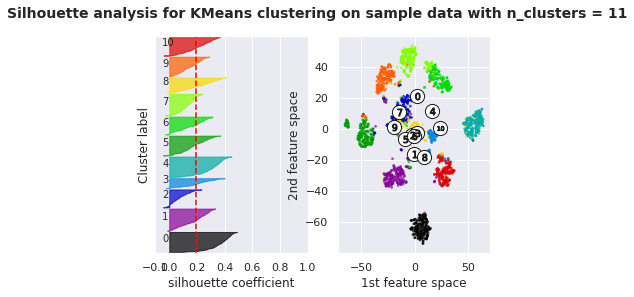

For n_clusters = 12 The average silhouette_score is : 0.19533195399322248


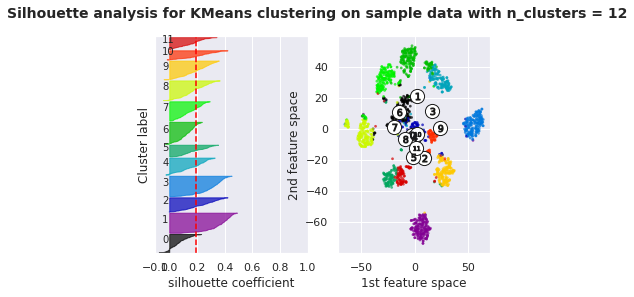

In [50]:
# add code to produce silhouette plots of k-means performance
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(pca_out)
  make_silhouette_plot(cluster_labels, pca_out, tsne_out)

#### Evaluation: compare to ground truth 

In [51]:
# Add code to compare the cluster labels to the ground truth 
new_data = transform_labels(kmeans.labels_, digits.target)
print(np.mean(new_data == digits.target))

0.7924318308291597


### Optional: Compare with Hierarchical Clustering 
Use [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) to analyze the data. 

How many clusters does this suggest? 
How do the true values from this clustering compare to those from our other methods? 

0.8619922092376182


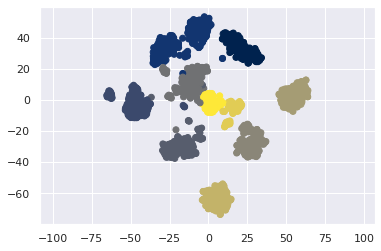

In [55]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=10).fit(data)
new_data = transform_labels(clusterer.labels_, digits.target)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=clusterer.labels_, cmap='cividis')
plt.axis('equal')
print(np.mean(new_data == digits.target))